In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("Netflix.csv")
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [3]:
df.duplicated().sum()

2

In [4]:
df.drop_duplicates(inplace=True)

Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

<AxesSubplot:>

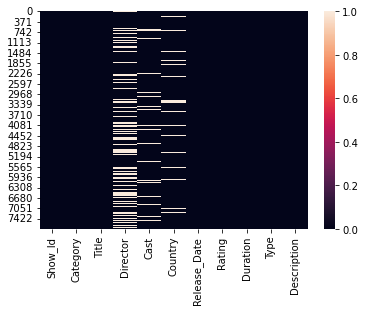

In [5]:
df.isna().sum()
sns.heatmap(df.isna())

Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [6]:
df
#df[df.Title.str.contains('House of Cards')][['Show_Id','Director']]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [50]:
df.columns
#df.Release_Date

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year',
       'MMM'],
      dtype='object')

In [7]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df['Year']=df['Release_Date'].dt.year


<AxesSubplot:>

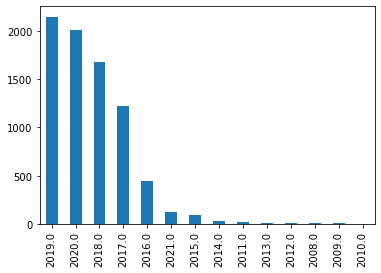

In [10]:
df.Year.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Year', ylabel='count'>

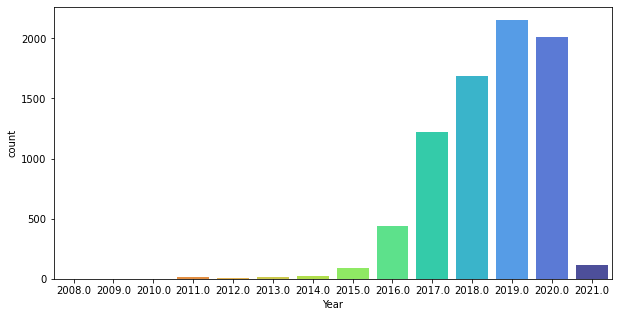

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'],palette='turbo_r')

In [49]:
df['MMM']=df['Country'].str[-3:].replace('yyy')

In [72]:
df["MMmM"] = df.Country.str[:-3]+"yyy"

In [113]:
df['Category'].str.split()
df1=pd.get_dummies(columns=['Category'],data=df)

In [118]:
df=pd.concat([df,df1])
df.replace(np.nan,'--')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,MMM,MMmM,MAH,Date,Category_Movie,Category_TV Show
0,s1,TV Show,3%,--,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,--,--,--,--,--,--,--
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,--,--,--,--,--,--,--
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",--,--,--,--,--,--,--
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",--,--,--,--,--,--,--
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,--,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,nds,"Sweden, Czech Republic, United Kingdom, Denmar...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19 00:00:00,1.0,0.0
7785,s7784,--,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02 00:00:00,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,dia,Inyyy,India,2019-03-02 00:00:00,1.0,0.0
7786,s7785,--,Zulu Man in Japan,--,Nasty C,--,2020-09-25 00:00:00,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,--,--,--,2020-09-25 00:00:00,1.0,0.0
7787,s7786,--,Zumbo's Just Desserts,--,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31 00:00:00,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,lia,Austrayyy,Australia,2020-10-31 00:00:00,0.0,1.0


Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

<AxesSubplot:>

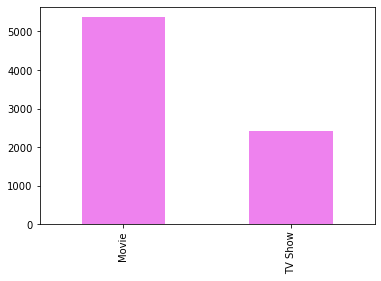

In [24]:
df
df.Category.value_counts().plot(kind='bar',color='violet')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


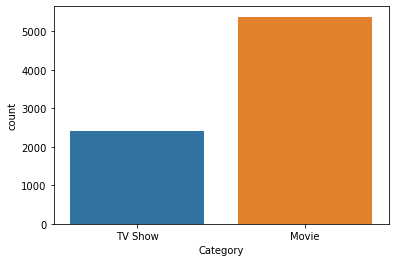

In [34]:
sns.countplot('Category',data=df)
plt.show()

Q. 4) Show all the Movies that were released in year 2000.

In [42]:
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0


Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [27]:
df[df['Country']=='India']['Title']

8                            706
9                           1920
18                        15-Aug
20          ​​Kuch Bheege Alfaaz
21                  ​Goli Soda 2
                  ...           
7766                        Zero
7771    Zindagi Na Milegi Dobara
7778                    Zokkomon
7782                         Zoo
7785                      Zubaan
Name: Title, Length: 923, dtype: object

Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

<AxesSubplot:xlabel='Director'>

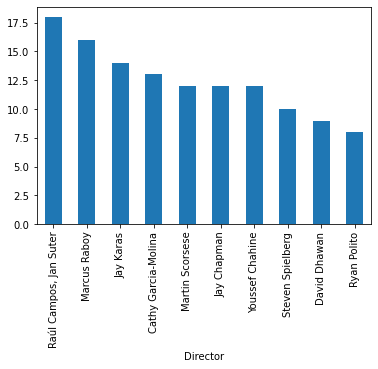

In [37]:
df.groupby('Director').count()['Category'].sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:ylabel='Director'>

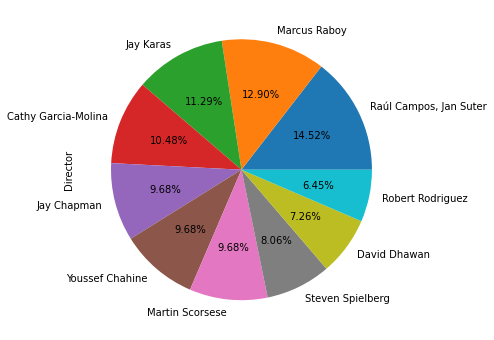

In [8]:
df.Director.value_counts().head(10).plot(kind='pie',autopct='%.2f%%',figsize=(10,6))

<AxesSubplot:xlabel='Director'>

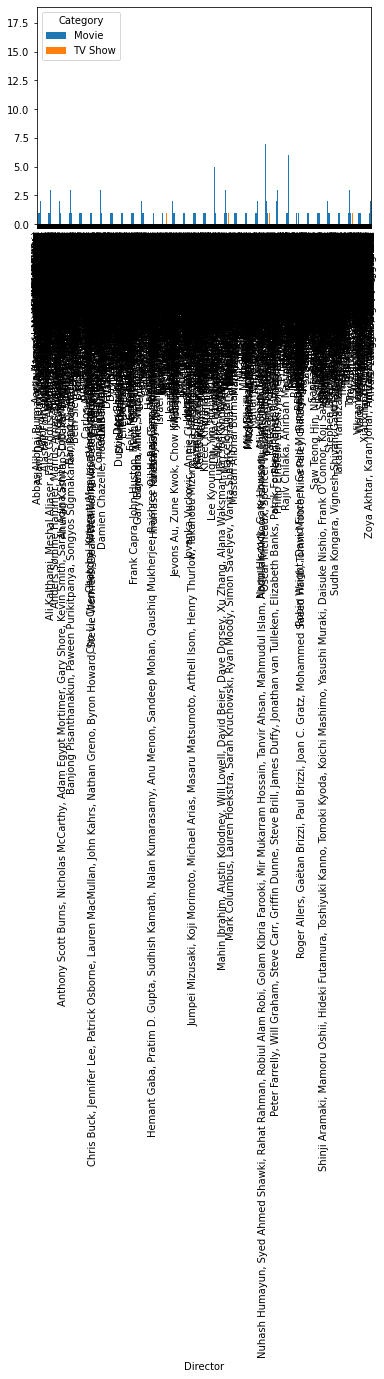

In [34]:
pd.crosstab(index=df['Director'],columns=df['Category'],values=df['Category'],aggfunc='count').plot(kind='bar')

Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [24]:
df.Cast.replace('NaN',np.nan,inplace=True)

In [30]:
df.dropna(subset=['Cast'],inplace=True)

In [32]:
df[df.Cast.str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


Q. 9) What are the different Ratings defined by Netflix ?

Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

Q. 11) Which individual country has the Highest No. of TV Shows ?

Q. 12) How can we sort the dataset by Year ?

Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.